# CMSE 201 Final Project Template

**INSTRUCTIONS**: This is a template to help organize your project.  All projects should include the 5 major sections below (you do not need to use this template file).  If you use this file, complete your work below and remove content in parentheses. Also, remove this current cell.  

#### CMSE 201 Final Project
### &#9989; Rodrigo Lara
### &#9989; Section 006
#### &#9989; December 1, 2021

# ___Has NAFTA caused a spike of obesity in Mexico?___

## Background and Motivation

The North America Free Trade Agreement (NAFTA) was an agreement signed by Canada, Mexico, and the United States that created a trilateral trade bloc in North America. The agreement was signed by Canada's prime minister Jean Chrétien, Mexico's President Carlos Salinas de Gortari, and United States President Bill Clinton. The treaty came into force on **January 1, 1994**.

The main purpose of this agreement was to eliminate or reduce the barriers to trade and invest between the U.S., Canada, and Mexico, but a decade after its impletementation investigations and news articles started to appear supposedly exposing the damages caused to Mexico regarding malnutrition and obesity.

So the question of this investigation is if its true that the North America Free Trade Agreement has affected somehow on the growth in malnutrition and obesity in Mexico. We will go ahead and read through some data and try to find some truth to this statemenets.

## Methodology

There are a number of articles, investigations and videos that provide an answer to our question, they say that the NAFTA has indeed affected Mexico's obesity they say that the United States has brought an obesity epidemic to it, lets go ahead and try to prove this accusation. 

A Nasty, Nafta-Related Surprise: Mexico’s Soaring Obesity ... https://www.nytimes.com/2017/12/11/health/obesity-mexico-nafta.html.

Treanor, Katy Watson and Sarah. “The Mexicans Dying for a Fizzy Drink.” BBC News, BBC, 2 Feb. 2016, https://www.bbc.com/news/magazine-35461270.

I went ahead and reviewed all the sources that this institutions cited on their investigations and couldn't found a dataset file for me to read myself they were just citing other investigations from other institution but not a single dataset was there for me to read. As a result, I went ahead an searched for dataset sources outside the articles and managed to find some. I used three of them

To found the answer to our question we will go through a couple of datasets from different sources. We will read them, clean them, analyze them and try to find some relation to our question.

### 1. World Health Organization; Percentage of obesity by country throughout the years.

In order to start building the answer to our question we will start by analysing the first data set, "Percentage of obesity by country throughout the years" by the World Health Organization.

#### Data Import

In [93]:
import pandas as pd 
import numpy as np
import statsmodels.api as statsm
import matplotlib.pyplot as plt
%matplotlib inline

WHO = pd.read_csv("WHO_Obesity_Celaned.csv")
print(WHO.head())

   Unnamed: 0      Country  Year    Obesity (%)         Sex
0           0  Afghanistan  1975  0.5 [0.2-1.1]  Both sexes
1           1  Afghanistan  1975  0.2 [0.0-0.6]        Male
2           2  Afghanistan  1975  0.8 [0.2-2.0]      Female
3           3  Afghanistan  1976  0.5 [0.2-1.1]  Both sexes
4           4  Afghanistan  1976  0.2 [0.0-0.7]        Male


#### Separating and Cleaning

As we can see from the .csv file we get data from every country in the world, we just want Mexico's data, lets go ahead and separate it by our desired country and by sexes. We should end up with three datasets. In addition, we come across one problem which is that the important information in column 'Obesity (%)' is a string which would not let us plot our information quite right, so we will also have to do some data manipulation to divide that column.

In [14]:
# Dataset with just Mexico data.
WHO_MX = WHO[WHO["Country"]=="Mexico"]

# Three datasets for each sex category, male, female and both.
WHO_MX_F = WHO_MX[WHO_MX["Sex"]=="Female"]
WHO_MX_M = WHO_MX[WHO_MX["Sex"]=="Male"]
WHO_MX_B = WHO_MX[WHO_MX["Sex"]=="Both sexes"]

# Data manipualtion to fix the 'Obesity(%)' column
val_f = WHO_MX_F["Obesity (%)"].str.split(" ", n = 1, expand = True)
WHO_MX_F["New Obesity"] = val_f[0]
WHO_MX_F["New Obesity"] = pd.to_numeric(WHO_MX_F["New Obesity"])

val_m = WHO_MX_M["Obesity (%)"].str.split(" ", n = 1, expand = True)
WHO_MX_M["New Obesity"] = val_m[0]
WHO_MX_M["New Obesity"] = pd.to_numeric(WHO_MX_M["New Obesity"])

val_b = WHO_MX_B["Obesity (%)"].str.split(" ", n = 1, expand = True)
WHO_MX_B["New Obesity"] = val_b[0]
WHO_MX_B["New Obesity"] = pd.to_numeric(WHO_MX_B["New Obesity"])

print(WHO_MX_F.head(),'\n')
print(WHO_MX_M.head(),'\n')
print(WHO_MX_B.head(),'\n')

       Unnamed: 0 Country  Year      Obesity (%)     Sex  New Obesity
13862       13862  Mexico  1975  13.0 [7.5-19.5]  Female         13.0
13865       13865  Mexico  1976  13.4 [8.0-19.8]  Female         13.4
13868       13868  Mexico  1977  13.9 [8.6-20.1]  Female         13.9
13871       13871  Mexico  1978  14.3 [9.2-20.3]  Female         14.3
13874       13874  Mexico  1979  14.8 [9.7-20.7]  Female         14.8 

       Unnamed: 0 Country  Year     Obesity (%)   Sex  New Obesity
13861       13861  Mexico  1975  5.7 [2.8-10.0]  Male          5.7
13864       13864  Mexico  1976  6.0 [3.1-10.3]  Male          6.0
13867       13867  Mexico  1977  6.4 [3.4-10.5]  Male          6.4
13870       13870  Mexico  1978  6.7 [3.7-10.8]  Male          6.7
13873       13873  Mexico  1979  7.0 [4.0-11.1]  Male          7.0 

       Unnamed: 0 Country  Year      Obesity (%)         Sex  New Obesity
13860       13860  Mexico  1975   9.5 [6.2-13.5]  Both sexes          9.5
13863       13863  Mexico 

<ipython-input-14-b6816f51ca21>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHO_MX_F["New Obesity"] = val_f[0]
<ipython-input-14-b6816f51ca21>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHO_MX_F["New Obesity"] = pd.to_numeric(WHO_MX_F["New Obesity"])
<ipython-input-14-b6816f51ca21>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

### 2. World Health Organization; Average BMI by country throughout the years.

The following dataset represents the average BMI by country by sexes througout the years.

#### Data Import

In [54]:
# Importing data
WHO_BMI = pd.read_csv("WHO_BMI.csv")
print(WHO_BMI.head())

  IndicatorCode                                          Indicator ValueType  \
0   NCD_BMI_30C  Prevalence of obesity among adults, BMI &Great...   numeric   
1   NCD_BMI_30C  Prevalence of obesity among adults, BMI &Great...   numeric   
2   NCD_BMI_30C  Prevalence of obesity among adults, BMI &Great...   numeric   
3   NCD_BMI_30C  Prevalence of obesity among adults, BMI &Great...   numeric   
4   NCD_BMI_30C  Prevalence of obesity among adults, BMI &Great...   numeric   

  ParentLocationCode   ParentLocation Location type SpatialDimValueCode  \
0                AFR           Africa       Country                 UGA   
1                AFR           Africa       Country                 ETH   
2                AFR           Africa       Country                 RWA   
3                WPR  Western Pacific       Country                 VNM   
4                AFR           Africa       Country                 BDI   

   Location Period type  Period  ...  FactValueUoM FactValueNumericL

#### Separating and Cleaning

This dataset is really messy, it contains a bunch of unnecessary information, for our cleaning process first we will display just data for Mexico, then we will go ahead and get rid of all this unnecessary columns, we will rename our useful columns with clearer names, after that we will divide the data by sexes and finally we will fix the little anomaly on our BMI column by using some data manipulation techniques.

In [56]:
# Cleaning the set to display Mexico's data only.
WHO_BMI_MX = (WHO_BMI[WHO_BMI["SpatialDimValueCode"]=="MEX"])

# Eliminating unnecessary data
WHO_BMI_MX = WHO_BMI_MX.drop(columns=['Period type','IndicatorCode','Indicator','ValueType','ParentLocationCode','ParentLocation','Location type'])
WHO_BMI_MX = WHO_BMI_MX.drop(columns=['IsLatestYear','Dim1 type','Dim1ValueCode','Dim2ValueCode','Dim2 type','Dim2','Dim3 type','Dim3','Dim3ValueCode'])
WHO_BMI_MX = WHO_BMI_MX.drop(columns=['DataSourceDimValueCode','DataSource','FactValueNumericPrefix','FactValueNumeric','FactValueUoM','FactValueNumericLowPrefix'])
WHO_BMI_MX = WHO_BMI_MX.drop(columns=['FactValueNumericLow','FactValueNumericHighPrefix','FactValueNumericHigh','FactValueTranslationID','FactComments','Language','DateModified'])

# Renaming columns for easier comprehension
WHO_BMI_MX.columns = ['Country Code','Country','Year','Sex','BMI']
print(WHO_BMI_MX.head())

    Country Code Country  Year         Sex                 BMI
217          MEX  Mexico  2016        Male  23.7 [18.5 – 29.1]
328          MEX  Mexico  2016  Both sexes  28.4 [24.7 – 32.3]
400          MEX  Mexico  2016      Female  32.6 [27.2 – 38.3]
798          MEX  Mexico  2015        Male  23.1 [18.3 – 28.2]
909          MEX  Mexico  2015  Both sexes  27.8 [24.4 – 31.5]


In [58]:
# Dividing by sexes
WHO_BMI_F = WHO_BMI_MX[WHO_BMI_MX["Sex"]=="Female"]
WHO_BMI_M = WHO_BMI_MX[WHO_BMI_MX["Sex"]=="Male"]
WHO_BMI_B = WHO_BMI_MX[WHO_BMI_MX["Sex"]=="Both sexes"]

# Data manipualtion to fix the 'BMI' column
val_bmi_f = WHO_BMI_F["BMI"].str.split(" ", n = 1, expand = True)
WHO_BMI_F["New BMI"] = val_bmi_f[0]
WHO_BMI_F["New BMI"] = pd.to_numeric(WHO_BMI_F["New BMI"])

val_bmi_m = WHO_BMI_M["BMI"].str.split(" ", n = 1, expand = True)
WHO_BMI_M["New BMI"] = val_bmi_m[0]
WHO_BMI_M["New BMI"] = pd.to_numeric(WHO_BMI_M["New BMI"])

val_bmi_b = WHO_BMI_B["BMI"].str.split(" ", n = 1, expand = True)
WHO_BMI_B["New BMI"] = val_bmi_b[0]
WHO_BMI_B["New BMI"] = pd.to_numeric(WHO_BMI_B["New BMI"])

print(WHO_BMI_F.head(),'\n')
print(WHO_BMI_M.head(),'\n')
print(WHO_BMI_B.head(),'\n')

     Country Code Country  Year     Sex                 BMI  New BMI
400           MEX  Mexico  2016  Female  32.6 [27.2 – 38.3]     32.6
984           MEX  Mexico  2015  Female    32 [26.9 – 37.4]     32.0
1566          MEX  Mexico  2014  Female  31.4 [26.5 – 36.5]     31.4
2160          MEX  Mexico  2013  Female  30.8 [26.3 – 35.6]     30.8
2750          MEX  Mexico  2012  Female  30.2 [25.9 – 34.7]     30.2 

     Country Code Country  Year   Sex                 BMI  New BMI
217           MEX  Mexico  2016  Male  23.7 [18.5 – 29.1]     23.7
798           MEX  Mexico  2015  Male  23.1 [18.3 – 28.2]     23.1
1377          MEX  Mexico  2014  Male    22.5 [18 – 27.2]     22.5
1969          MEX  Mexico  2013  Male    22 [17.7 – 26.3]     22.0
2551          MEX  Mexico  2012  Male  21.4 [17.4 – 25.6]     21.4 

     Country Code Country  Year         Sex                 BMI  New BMI
328           MEX  Mexico  2016  Both sexes  28.4 [24.7 – 32.3]     28.4
909           MEX  Mexico  2015  B

<ipython-input-58-56bf262aa16a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHO_BMI_F["New BMI"] = val_bmi_f[0]
<ipython-input-58-56bf262aa16a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHO_BMI_F["New BMI"] = pd.to_numeric(WHO_BMI_F["New BMI"])
<ipython-input-58-56bf262aa16a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

### 3. Our World in Data 'Food Supply'; Daily Caloric Supply per person per day throughout the years.

The following dataset represents the average total consumed calories per person per day througout the years.

#### Data Import

In [16]:
# Daily Caloric Supply per person per day
DCS = pd.read_csv("daily-per-capita-caloric-supply.csv")
DCS

,Entity,Code,Year,Daily caloric supply (FAO (2017) & Various historical sources)
0,Afghanistan,AFG,1961,2999.0
1,Afghanistan,AFG,1962,2917.0
2,Afghanistan,AFG,1963,2698.0
3,Afghanistan,AFG,1964,2953.0
4,Afghanistan,AFG,1965,2956.0
...,...,...,...,...
9546,Zimbabwe,ZWE,2009,2147.0
9547,Zimbabwe,ZWE,2010,2168.0
9548,Zimbabwe,ZWE,2011,2200.0
9549,Zimbabwe,ZWE,2012,2197.0


#### Separating and Cleaning

For this data set we will just go ahead and display the data for Mexico only.

In [18]:
# Cleaning the data to display Country=Mexico only.
DCS_MX = (DCS[DCS["Entity"]=="Mexico"])
DCS_MX.columns = ['Country','Code','Year',"Daily Caloric Supply"]
DCS_MX = DCS_MX.iloc[4:]
print(DCS_MX.head())

     Country Code  Year  Daily Caloric Supply
5527  Mexico  MEX  1961                2300.0
5528  Mexico  MEX  1962                2286.0
5529  Mexico  MEX  1963                2300.0
5530  Mexico  MEX  1964                2353.0
5531  Mexico  MEX  1965                2369.0


## Results

### Comparison between Obesity Percentage and BMI

- The Body Mass Index (BMI) is a value derived from the mass and height of a person. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m2, resulting from mass in kilograms and height in metres. 
- The BMI is a convenient rule of thumb used to broadly categorize a person as underweight, normal weight, overweight, or obese based on tissue mass (muscle, fat, and bone) and height.

$$BMI = \frac{weight(kg)}{height^2(m^2)} $$

$$\text{---Body Mass Index---}\\
\begin{bmatrix}
 \text{Underweight =< 18.5}\\
 \text{Normal weight = 18.5–24.9}\\
 \text{Overweight = 25-29.9}\\
 \text{Obesity => 30}
 \end{bmatrix}$$

#### Obesity Percentage by sexes throughout time

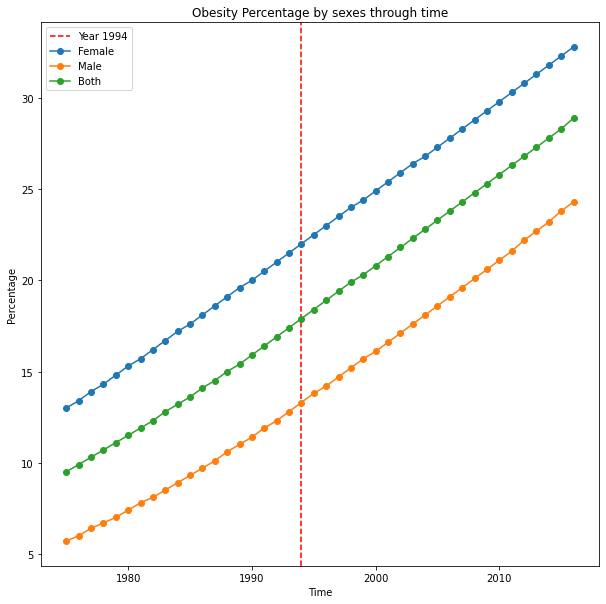

In [82]:
# Plotting
plt.figure(figsize = [10,10])
plt.axvline(x=1994, color = 'r', label = 'Year 1994', linestyle = '--')# Year 1994
plt.plot(WHO_MX_F["Year"], WHO_MX_F["New Obesity"], label = "Female", marker = 'o') # Female
plt.plot(WHO_MX_M["Year"], WHO_MX_M["New Obesity"], label = "Male", marker = 'o')# Male
plt.plot(WHO_MX_B["Year"], WHO_MX_B["New Obesity"], label = "Both", marker = 'o')# Both
# Title and axis names
plt.title('Obesity Percentage by sexes through time')
plt.xlabel('Time')
plt.ylabel('Percentage')
plt.legend()

From our "World Health Organization; Percentage of obesity by country throughout the years." data set we got the above plot, x being our 'time' variable and y being our 'Obesity percentage'. The data plots are also divided in three colors, the blue color represents the 'Female' obesity percentage increase, the orange color represents the 'Male' obesity percentage increase and the green color represents both sexes. The red pointed vertical line represents the year 1994 which is the year that the NAFTA came into force.

After reading all the articles calling the NAFTA the main cause for Mexico's Obesity epidemic one would expect a disruptive hyperbolic growth on obesity after 1994 but from what we can see in the graph there doesn't seem to be any difference in growth.

#### Average BMI by sexes throughout time 

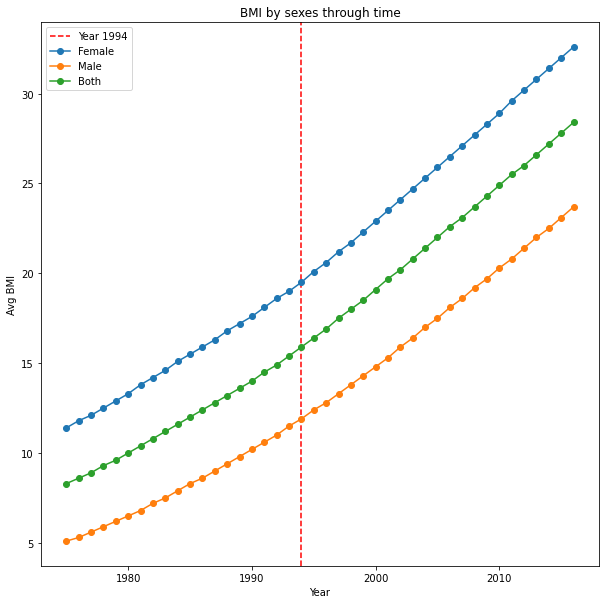

In [91]:
# Plotting
plt.figure(figsize = [10,10])
plt.axvline(x=1994, color = 'r', label = 'Year 1994', linestyle = '--')# Year 1994
plt.plot(WHO_BMI_F["Year"], WHO_BMI_F["New BMI"], label = "Female", marker = 'o') # Female
plt.plot(WHO_BMI_M["Year"], WHO_BMI_M["New BMI"], label = "Male", marker = 'o')# Male
plt.plot(WHO_BMI_B["Year"], WHO_BMI_B["New BMI"], label = "Both", marker = 'o')# Both
# Title and axis names
plt.title('BMI by sexes through time')
plt.xlabel('Year')
plt.ylabel('Avg BMI')
plt.legend()

From our "World Health Organization; Average BMI by country throughout the years." data set we got the above plot, x being our 'time' variable and y being our 'Obesity percentage'. The data plots are also divided in three colors, the blue color represents the 'Female' obesity percentage increase, the orange color represents the 'Male' obesity percentage increase and the green color represents both sexes. The red pointed vertical line represents the year 1994 which is the year that the NAFTA came into force.

After reading all the articles calling the NAFTA the main cause for Mexico's Obesity epidemic one would expect a disruptive hyperbolic growth on the average BMI after 1994 but from what we can see in the graph there doesn't seem to be any difference in growth.

#### Comparison between Obesity Percentage and BMI

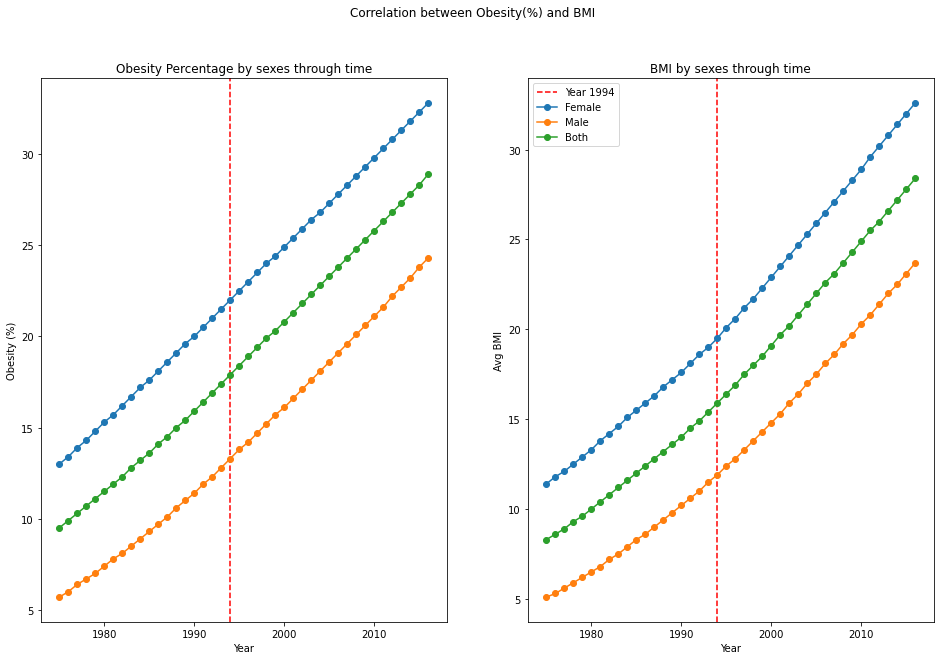

In [84]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,10))

# Obesity Percentage throughout Time.----------
ax1.axvline(x=1994, color = 'r', label = 'Year 1994', linestyle = '--')# Year 1994
ax1.plot(WHO_MX_F["Year"], WHO_MX_F["New Obesity"], label = "Female", marker = 'o') # Obesity Female
ax1.plot(WHO_MX_M["Year"], WHO_MX_M["New Obesity"], label = "Male", marker = 'o')# Obesity Male
ax1.plot(WHO_MX_B["Year"], WHO_MX_B["New Obesity"], label = "Both", marker = 'o')# Obesity Both
# Title and axis names
ax1.set_title('Obesity Percentage by sexes through time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Obesity (%)')

# Average BMI throughout Time.----------
ax2.axvline(x=1994, color = 'r', label = 'Year 1994', linestyle='--')# Year 1994
ax2.plot(WHO_BMI_F["Year"], WHO_BMI_F["New BMI"], label = "Female", marker = 'o') # BMI Female
ax2.plot(WHO_BMI_M["Year"], WHO_BMI_M["New BMI"], label = "Male", marker = 'o')# BMI Male
ax2.plot(WHO_BMI_B["Year"], WHO_BMI_B["New BMI"], label = "Both", marker = 'o')# BMI Both
# Title and axis names
ax2.set_title('BMI by sexes through time')
ax2.set_xlabel('Year')
ax2.set_ylabel('Avg BMI')

fig.suptitle("Correlation between Obesity(%) and BMI")
plt.legend()

Just what we expected, as Obesity percentage increases the average BMI of its citizens also increase. This comparison was made just to have another source to confirm our final result. Both plots are having a linear growth and after the year 1994 the rate of change doesn't seem to increase at all, so I think we are starting to see a patern in here.

### Average Daily Caloric Supply and Rate of Change by Person by Day

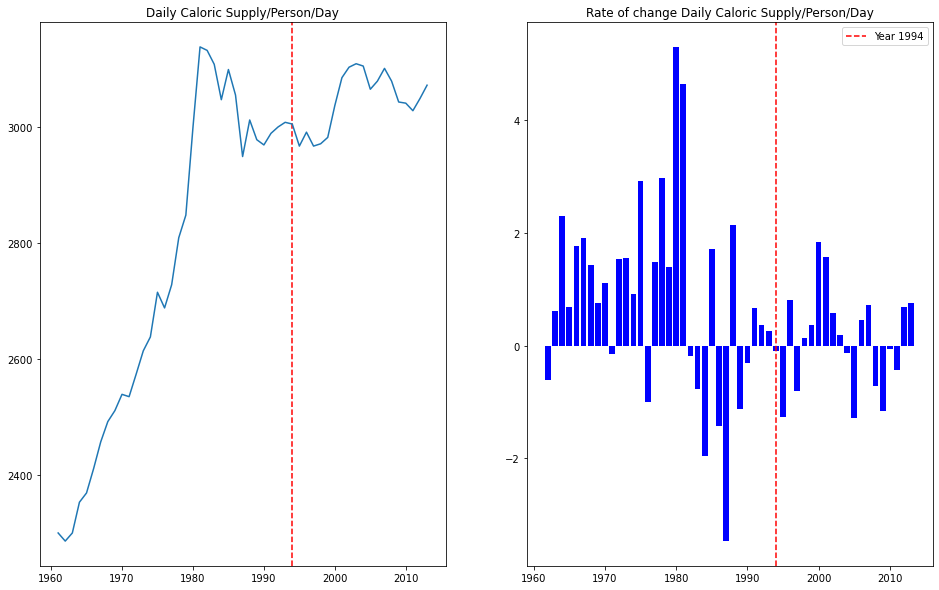

In [90]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,10))

ax1.axvline(x=1994, color = 'r', label = 'Year 1994', linestyle = '--')
ax1.plot(DCS_MX["Year"], DCS_MX["Daily Caloric Supply"])
ax1.set_title('Daily Caloric Supply/Person/Day')

ax2.axvline(x=1994, color = 'r', label = 'Year 1994', linestyle = '--')
ax2.bar(DCS_MX["Year"], DCS_MX["Daily Caloric Supply"].pct_change()*100, color = 'blue')
ax2.set_title('Rate of change Daily Caloric Supply/Person/Day')

plt.legend()

On our last analysis from our 'Our World in Data 'Food Supply'; Daily Caloric Supply per person per day throughout the years.' dataset we get the plots above, the one on th eleft represents the Average Daily Caloric Supply per Person per Day throughout the years and the one on the right represents the Rate of change of Daily Caloric Supply per Person per Day throughout the years.

From our first plot we can see that we have a hyperbolic increase in the average consumption of calories but that happened long before the NAFTA came into force, after the NAFTA it seems that the caloric consumption is just consolidating around the 3000 calories.

From our second graph we can see that the largest spikes in positive rates of change were also before the NAFTA agreement.

## Discussion and Conclusion

Lets recapitulate, from all the readed articles we started with the idea that the NAFTA had cause serious repercussions to Mexico in the topic of Obesity and Malnutrition, but after going through our collected data, reading it, separating it, cleaning it and analyzing it we plotted them and discovered something really interesting.

In conclusion the NAFTA didn't caused any growth on obesity in Mexico the graphs show a linear increase in both obesity and BMI without any anomalies after the year 1994, that the NAFTA came into force. Regarding the average caloric intake per person per day we explored this dataset to try to find some anomaly in the diet of the average Mexican after the NAFTA but we discovered that Mexico had its increase and reached a peak of 3500 calories per day long before the NAFTA came into force.

So in short words, no, the NAFTA did not cause an increase in obesity in Mexico.

### References

**Data**

1. Autio, Arttu. “Who Overweight by Country 2016.” Kaggle, 22 Mar. 2020, https://www.kaggle.com/arttua/who-overweight-by-country-2016.

2. “Prevalence of Obesity among Adults, Bmi &gt;= 30 (Age-Standardized Estimate) (%).” World Health Organization, World Health Organization, https://www.who.int/data/gho/data/indicators/indicator-details/GHO/prevalence-of-obesity-among-adults-bmi-=-30-(age-standardized-estimate)-(-).

3. Kerneler. “Starter: Obesity among Adults by 5E8D7ADA-7.” Kaggle, Kaggle, 8 May 2020, https://www.kaggle.com/kerneler/starter-obesity-among-adults-by-5e8d7ada-7/data.

4. Roser, Max, and Hannah Ritchie. “Food Supply.” Our World in Data, 5 Mar. 2013, https://ourworldindata.org/food-supply. 

**Articles**

5. “El Tlcan Trajo Obesidad a México.” El Universal, 13 Nov. 2017, https://www.eluniversal.com.mx/nacion/sociedad/el-tlcan-trajo-obesidad-mexico. [Spanish]

6. A Nasty, Nafta-Related Surprise: Mexico’s Soaring Obesity ... https://www.nytimes.com/2017/12/11/health/obesity-mexico-nafta.html.

7. Treanor, Katy Watson and Sarah. “The Mexicans Dying for a Fizzy Drink.” BBC News, BBC, 2 Feb. 2016, https://www.bbc.com/news/magazine-35461270.